In [1]:
from matplotlib import pyplot as plt
import numpy as np
from math import pi
from scipy.stats import norm
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel

In [2]:
# Objective Function
def f(x):
#    return x * np.sin(x)
    return x*np.sin(x+1)-np.cos(x-2)+0.5*(1 - x)

# Gaussian Process Model
kernel = ConstantKernel(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))
#kernel = RBF(1.0)
gp=GaussianProcessRegressor(kernel=kernel)

# Prediction by GP
def prediction(X, Y, Xcand):
  gp.fit(X,Y)
  mu,sigma = gp.predict(Xcand, return_std=True)
  return mu,sigma

# Acquizition by Probability of Improvement
def PI(mu, sigma, best, zeta):
  z = (mu-best-zeta)/sigma
  return norm.cdf(z)


In [3]:
# Observed Data
X = np.linspace(-18.9, 18.9, 4).reshape(-1,1)
Y = f(X).ravel()

# Candidate Data
Xcand = np.sort(np.random.uniform(-20., 20.0,1000)).reshape(-1,1)
Ycand = f(Xcand).ravel()


In [4]:
# Plot
def plot_iter(X,Y, mu, sigma, xn, yn):
  plt.figure(figsize=[8,6])
  plt.plot(xn, yn, 'kD', markersize=10, label='Suggest')
  plt.plot(Xcand, Ycand, 'r:', markersize=1, label=r'$f(x)$')
  plt.plot(X, Y, 'r.', markersize=10, label='Observations')
  plt.plot(Xcand, mu, 'b-', markersize=1, label='Prediction($\mu$)')
  plt.fill(np.concatenate([Xcand, Xcand[::-1]]),
         np.concatenate([mu - sigma,
                        (mu + sigma)[::-1]]),
         alpha=.5, fc='b', ec='None', label='95% confidence interval')
  plt.legend(loc='best')
  plt.show();


/Users/escortkwon/miniforge3/envs/Drill_ML/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:402: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn("The optimal value found for "


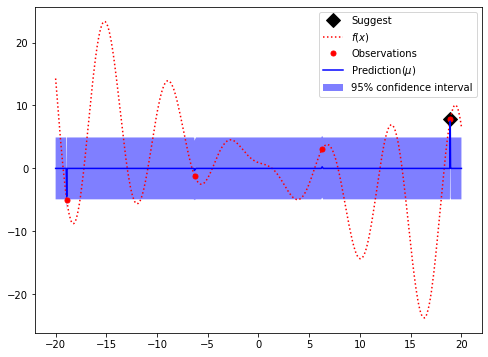

In [5]:
# Repeat Execution
mu, sigma = prediction(X, Y, Xcand)
a = PI(mu, sigma, max(Y), 0.1)
xn = Xcand[a.argmax()]
yn = f(xn)
plot_iter(X.ravel(), Y, mu, sigma, xn, yn)

X = np.append(X,np.array([xn])).reshape(-1,1)
Y = np.append(Y,np.array(yn))